<a href="https://colab.research.google.com/github/RaghulRajM/Document_Clustering/blob/main/Unsupervised_learning_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hierarchical Clustering Exercise

### Importing the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import *
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import LocalOutlierFactor
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

### Reading files

In [ ]:
hierarchical_clustering_data=pd.read_csv("dailykos.csv")

In [ ]:
hierarchical_clustering_data.head()

,abandon,abc,ability,abortion,absolute,abstain,abu,abuse,accept,access,...,yeah,year,yesterday,york,youll,young,youre,youve,zogby,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0


**Note:** Since all my variables are of same unit(indicating the count in each document), I'm not normalizing them

### Questions

### 1.	Build a hierarchical clustering model with euclidean as distance measure and ward as clustering criterion. R users can use ward.D2. Plot a dendrogram to show the model.

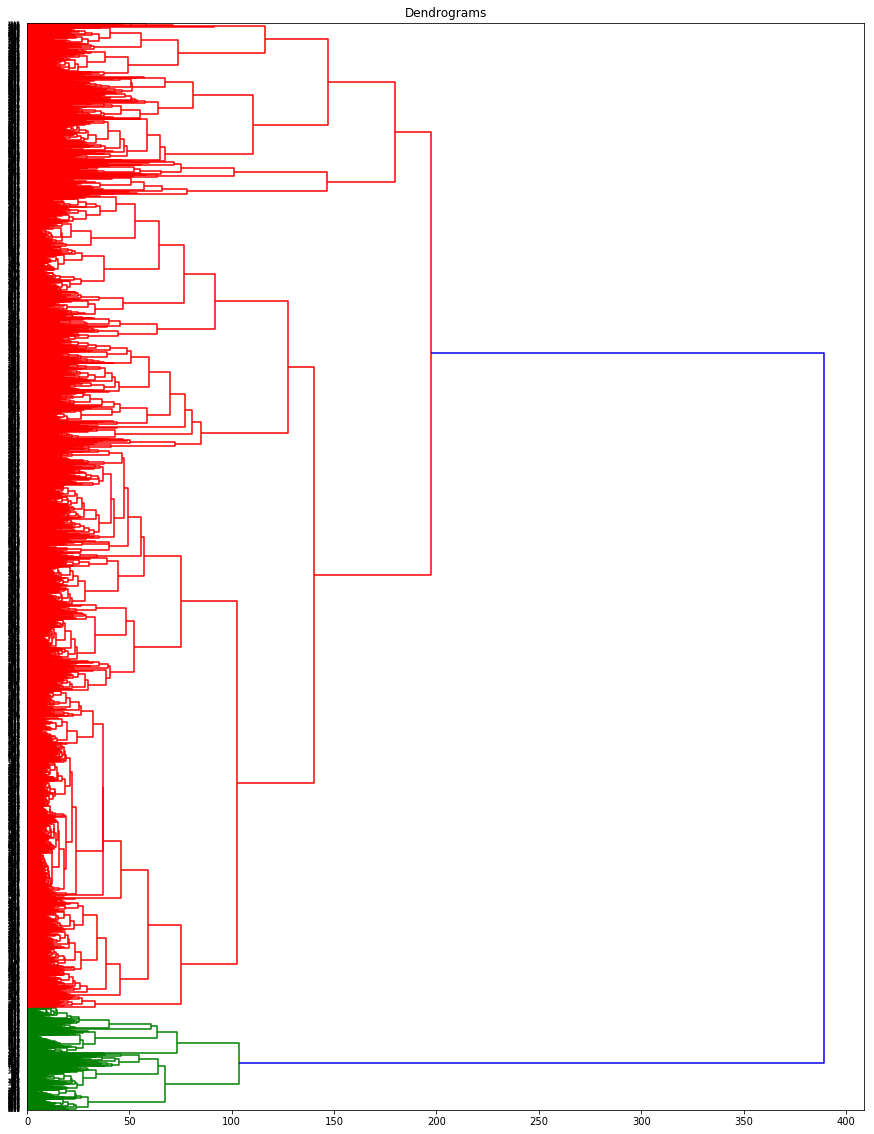

In [ ]:
plt.figure(figsize=(15, 20))
plt.title("Dendrograms")

#Obtaining the linkage matrix for every cluster formation using method 'ward' and distance metric as Euclidean
linkage_matrix=shc.linkage(hierarchical_clustering_data, method='ward',metric='euclidean')

#Plotting a dendogram for visualization
dend = shc.dendrogram(linkage_matrix, orientation="right")

### 2.	Split the Data into 7 clusters based on the above model and show the distribution(number of observations) of each cluster

In [ ]:
#Fitting the data with number of clusters as 7, distance metric as Euclidean and linkage type as ward
cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
cluster_output = cluster.fit_predict(hierarchical_clustering_data)

In [ ]:
cluster_output

array([2, 1, 3, ..., 2, 2, 2], dtype=int64)

In [ ]:
#Distribution of each cluster
Counter(cluster_output)

Counter({2: 1761, 1: 167, 3: 324, 0: 803, 6: 50, 4: 270, 5: 55})

### 3.	Which clusters have the most, least and median number of observations? Assist your answers with data.

From the above dictionary we can observe that

**Cluster_id 2** has the **most**

**Cluster_id 6** has the **least**

**Cluster_id 4** is the **median**

### 4.	Identify the most important words in the clusters found for the previous question. Importance is nothing but mean frequency values of each words in a given cluster

In [ ]:
#Creating a copy of the data
data_copy=hierarchical_clustering_data.copy()
#Adding the Clusted Id's obtained to the original dataframe
data_copy['Cluster_id']=cluster_output

In [ ]:
#Displaying the most important word for each cluster based on the mean frequency values of the words
data_copy.groupby(['Cluster_id']).apply(lambda x: x.mean()).iloc[:,:-1].idxmax(axis=1)

Cluster_id
0        poll
1       kerry
2        bush
3    november
4        bush
5        dean
6    democrat
dtype: object

### 5.	Identify 6 most important words in each cluster.

In [ ]:
#Printing the top 6 words based on the mean frequency values of the words for each cluster
data_copy.groupby(['Cluster_id']).apply(lambda x: x.mean()).iloc[:,:-1].apply(lambda s: s.abs().nlargest(6).index.tolist(), axis=1)

Cluster_id
0     [poll, kerry, bush, democrat, republican, elect]
1    [kerry, bush, campaign, poll, presided, democrat]
2    [bush, democrat, kerry, state, presided, repub...
3    [november, poll, vote, challenge, bush, democrat]
4    [bush, iraq, war, administration, american, pr...
5    [dean, kerry, democrat, edward, candidate, gep...
6    [democrat, parties, state, republican, senate,...
dtype: object

### 6.	Which cluster could best be described as the cluster related to the Iraq war? Support the answer with data

Going by the important words, we observe that the **Cluster id 4** describes more about the Iraq war, as we can see terms like: Bush,Iraq,War,Adminitration,American in the top.

In [ ]:
#Displaying the top 20 words supporting the claim
data_copy.groupby(['Cluster_id']).apply(lambda x: x.mean()).iloc[:,:-1].apply(lambda s: s.abs().nlargest(20).index.tolist(), axis=1).values[4]

['bush',
 'iraq',
 'war',
 'administration',
 'american',
 'presided',
 'time',
 'iraqi',
 'official',
 'report',
 'year',
 'house',
 'people',
 'attack',
 'state',
 'nation',
 'white',
 'govern',
 'democrat',
 'military']

To further support this we can see that it also includes words like iraqi,attack,people,state,nation,govern,democrat and military

### 7.In 2004, one of the candidates for the Democratic nomination for the President of the United States was Howard Dean, John Kerry was the candidate who won the democratic nomination, and John Edwards with the running mate of John Kerry (the Vice President nominee). Given this information, which cluster best corresponds to the democratic party. Support the answer with data

In [ ]:
#Displaying the top 20 words supporting the claim
data_copy.groupby(['Cluster_id']).apply(lambda x: x.mean()).iloc[:,:-1].apply(lambda s: s.abs().nlargest(20).index.tolist(), axis=1).values[5]

['dean',
 'kerry',
 'democrat',
 'edward',
 'candidate',
 'gephardt',
 'primaries',
 'clark',
 'campaign',
 'support',
 'union',
 'iowa',
 'state',
 'endorse',
 'caucus',
 'win',
 'poll',
 'vote',
 'people',
 'parties']

Again going by the important words, we observe that the **Cluster id 5** has the name of nominees 'Dean','Kerry','Edward' in the top and also words like democrat,candidate,campaign,support etc are strongly supporting the choice of cluster.

# K-Prototype Exercise

### Reading file

In [ ]:
k_prototype_data=pd.read_csv("transfusion.csv")

In [ ]:
k_prototype_data.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2 months,50,12500,98,Yes
1,0 months,13,3250,28,Yes
2,1 months,16,4000,35,Yes
3,2 months,20,5000,45,Yes
4,1 months,24,6000,77,No


### Preprocessing

In [ ]:
#Removing the string months from column 1
k_prototype_data['Recency (months)'] = k_prototype_data['Recency (months)'].str.replace('months','').astype(int)
#Encoding the categorical variable
k_prototype_data['whether he/she donated blood in March 2007'] = np.where(k_prototype_data['whether he/she donated blood in March 2007']=='Yes',1,0)

In [ ]:
k_prototype_data.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


### Normalizing the data

In [ ]:
copy_data=k_prototype_data.copy()
#Applying normalizing to bring it to uniform scale of 0-1
copy_data.iloc[:,:-1]=normalize(copy_data.iloc[:,:-1])

In [ ]:
copy_data.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,0.000160,0.004,0.999961,0.007840,1
1,0.000000,0.004,0.999955,0.008615,1
2,0.000250,0.004,0.999954,0.008750,1
3,0.000400,0.004,0.999951,0.009000,1
4,0.000167,0.004,0.999910,0.012832,0


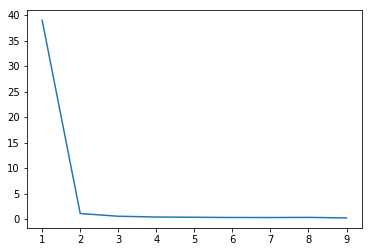

In [ ]:
#Choosing optimal K by using an elbow curve plot(Cost vs Number of clusters)
cost = []
for num_clusters in list(range(1,10)):
    kproto = KPrototypes(n_clusters=num_clusters)
    kproto.fit_predict(copy_data, categorical=[4])
    cost.append(kproto.cost_)

plt.plot(range(1,len(cost)+1),cost)

#### Since the curve seems to flatten quite early, I'll try to mean standardize the data instead

### Mean Standardizing the data

In [ ]:
standardized_data = k_prototype_data.copy()
cols = standardized_data.columns[:-1]
#Applying standardization to get a standard normal distribution with mean 0 and standard deviation 1
standardized_data[cols] = standardized_data[cols].apply(lambda x: (x - x.mean()) / np.std(x))

### Finding the optimal number of clusters using the elbow curve

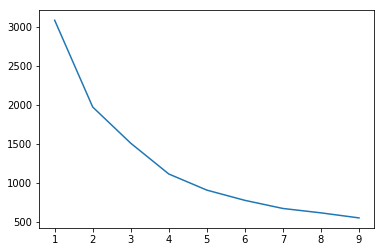

In [ ]:
#Choosing optimal K by using an elbow curve plot(Cost vs Number of clusters)
cost = []
for num_clusters in list(range(1,10)):
    kproto = KPrototypes(n_clusters=num_clusters)
    kproto.fit_predict(standardized_data, categorical=[4])
    cost.append(kproto.cost_)

plt.plot(range(1,len(cost)+1),cost)

From the curve we see that **4** would be a good choice for number of cluster as we see a elbow there

### Fitting our model

In [ ]:
# Running K-Prototype clustering
kproto = KPrototypes(n_clusters=4)
# Defining that the 5th column is a categorical variable
clusters = kproto.fit_predict(standardized_data, categorical=[4])

In [ ]:
#Assigning the cluster id to the dataframe
standardized_data['Cluster_id'] = clusters

In [ ]:
#Appling mean for each clusters to understand the profiles
standardized_data.iloc[:,[0,1,2,3,5]].groupby('Cluster_id').apply(np.mean)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),Cluster_id
Cluster_id,,,,,
0,-0.666036,-0.427954,-0.427954,-0.749625,0.0
1,-0.306027,0.845485,0.845485,1.012136,1.0
2,1.019076,-0.430262,-0.430262,-0.043057,2.0
3,-0.521753,4.832499,4.832499,2.120099,3.0


#### Checking for the difference between columns Frequency (times) & Monetary (c.c. blood)

In [ ]:
standardized_data[~(round(standardized_data['Frequency (times)'],6)==round(standardized_data['Monetary (c.c. blood)'],6))]

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007,Cluster_id


**Note:** The attributes `Frequency (times)` and `Monetary (c.c. blood)` are exactly same upto six decimals after normalizing. So dropping one of it for profiling

In [ ]:
standardized_data.drop(columns='Monetary (c.c. blood)',inplace=True)

### Snake plot for profiling

In [ ]:
datamart_melt = pd.melt(standardized_data,id_vars=['Cluster_id'],value_vars=standardized_data.columns[:-2],var_name='Attribute',value_name='Value')

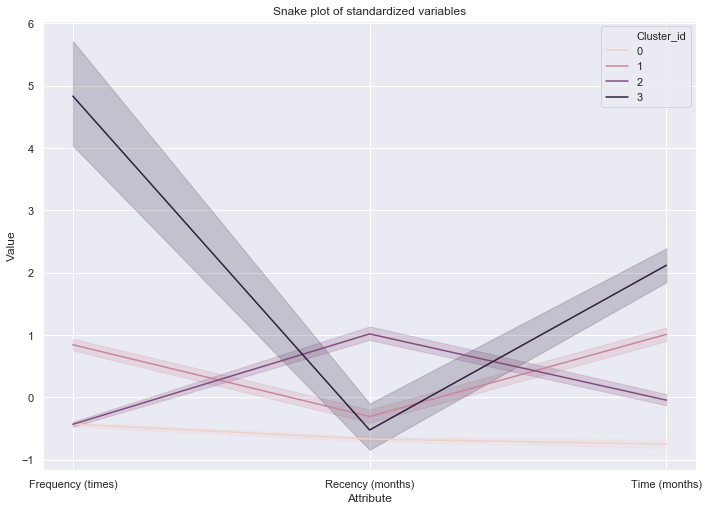

In [ ]:
plt.title('Snake plot of standardized variables')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(x="Attribute", y="Value", hue='Cluster_id', data=datamart_melt)

#### Checking the percentage of people who donated and not donated in March 2007 wrt the Total population

In [ ]:
standardized_data.groupby(['Cluster_id','whether he/she donated blood in March 2007']).apply(lambda x: (len(x['whether he/she donated blood in March 2007'])*100)/len(standardized_data[standardized_data['Cluster_id']==x['Cluster_id'].values[0]]))

Cluster_id  whether he/she donated blood in March 2007
0           0                                             68.750000
            1                                             31.250000
1           0                                             50.000000
            1                                             50.000000
2           0                                             90.980392
            1                                              9.019608
3           0                                             69.633508
            1                                             30.366492
dtype: float64

**Profiles:**

**Cluster 0:** Less frequent donors who had recently donated and also had made their first donation recently.

**Cluster 1:** Medium frequent donors who had recently donated.

**Cluster 2:** Less frequent donors who did not make a recent donation and did not donate blood in March 2007.

**Cluster 3:** High frequent donors who had recently donated and it's been a long time since their first donation.


# DBSCAN Exercise

### 1 Run a K means algorithm on the dataset circles.csv  and decide the number of clusters.



In [ ]:
X=pd.read_csv("circles.csv")
#Feature Scaling
X = pd.DataFrame(StandardScaler().fit_transform(X),columns=['X','Y'])
X

,X,Y
0,-0.183302,0.735688
1,-0.139811,0.673523
2,0.328701,0.475585
3,-0.735278,1.639124
4,-0.091355,-0.459513
5,1.552898,1.124417
6,-0.326801,-0.681594
7,0.335828,-0.155158
8,-0.698280,-0.021010
9,0.423742,-0.323533


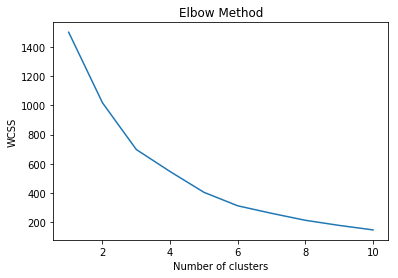

In [ ]:
#Finding optimal number of clusters using elbow curve(SSE vs Number of clusters)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

We can observe that the curve is approximately(not very convincing though) flattening when number of clusters is 5

In [ ]:
#Running Kmeans for number of clusters as 5
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
#Storing the Cluster number as a column in original data
X['Cluster']=pred_y

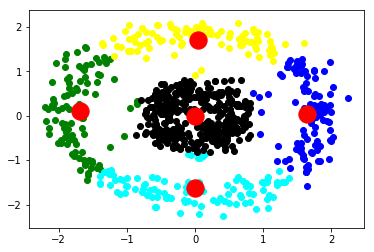

In [ ]:
#Plotting the points with their cluster and centroids
color=['blue','green','cyan','black','yellow']
for k in range(5):
    data=X[X["Cluster"]==k]
    plt.scatter(data.iloc[:,0],data.iloc[:,1],c=color[k])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

This result of K means is not convincing as we can see that it's giving different clusters for even the closest points

### 2: Now run DB Scan on the dataset ‘circles.csv’. Interpret the results. How is this different from K Means? What are the shortcomings and advantages in the two algorithms? Also ,how did you determine the number of clusters in DBSCAN?

In [ ]:
X=pd.read_csv("circles.csv")
#Feature Scaling
X = pd.DataFrame(StandardScaler().fit_transform(X),columns=['X','Y'])
X

,X,Y
0,-0.183302,0.735688
1,-0.139811,0.673523
2,0.328701,0.475585
3,-0.735278,1.639124
4,-0.091355,-0.459513
5,1.552898,1.124417
6,-0.326801,-0.681594
7,0.335828,-0.155158
8,-0.698280,-0.021010
9,0.423742,-0.323533


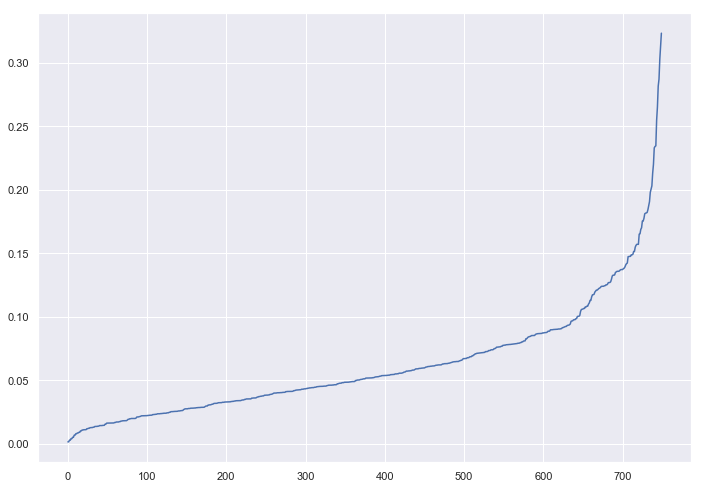

In [ ]:
#Finding the optimal eps for DBSCAN. Trying it out for number of neighbours as 10
neigh = NearestNeighbors(n_neighbors=10)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

We can see an elbow at approximately 0.13 as eps

In [ ]:
#Running DBSCAN with the obtained optimal eps
db=DBSCAN(eps=0.13,min_samples=10).fit(X)

In [ ]:
np.unique(df.labels_)

array([-1,  0,  1], dtype=int64)

In [ ]:
#Assigning lables to the dataframe as columns
X['Cluster']=df.labels_

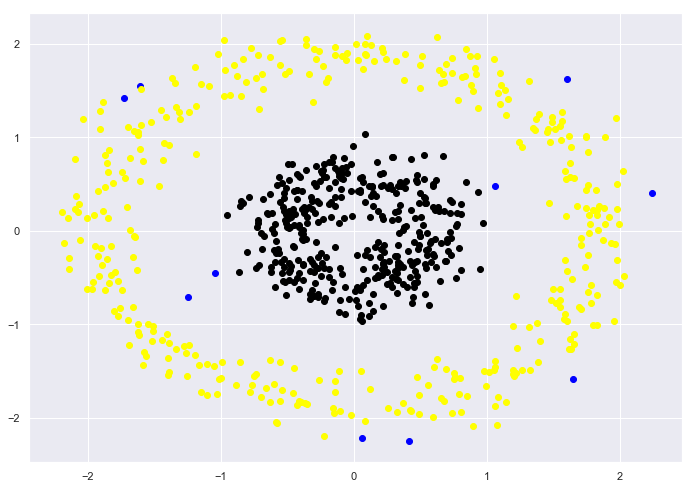

In [ ]:
#Plotting the points with their clusters
color=['blue','black','yellow']
for k in range(-1,2):
    data=X[X["Cluster"]==k]
    plt.scatter(data.iloc[:,0],data.iloc[:,1],c=color[k+1])
plt.show()

This result looks good as it is properly clustering points and able to detect outliers as well.

### K means

**Advantages**:

It is a lot faster than DBSCAN

Works well when finding spherical-shaped clusters or convex clusters ie. for compact and well separated clusters

**Disadvantages**:

The k-means algorithm is sensitive to outliers. Since an object with an extremely large value may substantially distort the distribution of the data.

Dependency on choice of initial centroids.

Number of clusters to be provided beforehand

### DBSCAN

**Advantages**:

Clusters can have arbitrary shape and size and Number of clusters is determined automatically

Resistant to Noise


**Disadvantages**:

Input parameters may be difficult to determine

Cannot handle Varying densities and sensitive to parameters



**How did you determine the number of clusters in DBSCAN?**- Number of clusters is automatically done by DBSCAN, The optimal eps was found using k-dist plot

# LOF Exercise

### 1)The dataset LOF contains two columns. Ignoring the 1st row as header, run a K means algorithm to find out the clusters present in this.

In [ ]:
data_lof=pd.read_csv('LOF.csv')
#Replacing column names 0 and 1 with X and Y
data_lof.rename(columns={'0':'X','1':'Y'},inplace=True)
#Feature Scaling
data_lof = pd.DataFrame(StandardScaler().fit_transform(data_lof),columns=['X','Y'])
data_lof

,X,Y
0,1.180574,0.938455
1,1.003545,0.921577
2,1.135748,0.920261
3,0.853590,0.597845
4,0.798168,0.898308
5,0.935461,0.810821
6,1.022023,1.326454
7,1.139366,1.088699
8,0.774000,0.964183
9,1.119522,1.042117


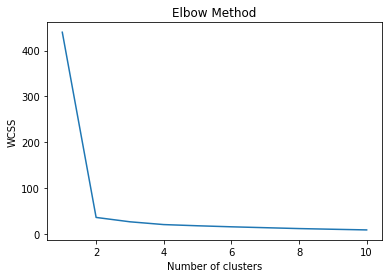

In [ ]:
#Finding optimal number of clusters using elbow curve(SSE vs Number of clusters)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_lof)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

We observe edge when number of cluster is 2

In [ ]:
#Running K means for the obtained optimal number of clusters
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(data_lof)
#Storing the Cluster number as a column in original dataframe
data_lof['Cluster']=pred_y

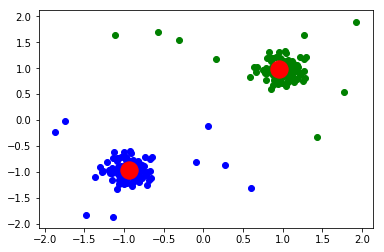

In [ ]:
#Plotting the points with their cluster and centroids
color=['blue','green']
for k in range(2):
    data=data_lof[data_lof["Cluster"]==k]
    plt.scatter(data.iloc[:,0],data.iloc[:,1],c=color[k])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

### 2:Now try running LOF and figuring out the data points that can be labelled as outliers present in this.

In [ ]:
data_lof=pd.read_csv('LOF.csv')
#Replacing column names 0 and 1 with X and Y
data_lof.rename(columns={'0':'X','1':'Y'},inplace=True)
#Feature Scaling
data_lof = pd.DataFrame(StandardScaler().fit_transform(data_lof),columns=['X','Y'])
data_lof

,X,Y
0,1.180574,0.938455
1,1.003545,0.921577
2,1.135748,0.920261
3,0.853590,0.597845
4,0.798168,0.898308
5,0.935461,0.810821
6,1.022023,1.326454
7,1.139366,1.088699
8,0.774000,0.964183
9,1.119522,1.042117


In [ ]:
#Running LOF
clf = LocalOutlierFactor(n_neighbors=10)
pred_y=clf.fit_predict(data_lof)

In [ ]:
#Storing the LOF cluster number as columns
data_lof['Cluster']=pred_y

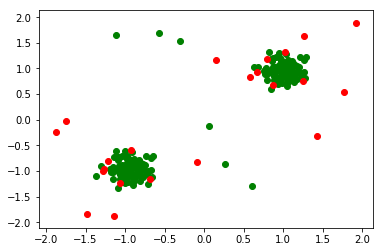

In [ ]:
#Plotting the points with their cluster and outliers
color=['blue','green','red']
for k in data_lof['Cluster'].unique():
    data=data_lof[data_lof["Cluster"]==k]
    plt.scatter(data.iloc[:,0],data.iloc[:,1],c=color[k])
plt.show()

# Factor Analysis Exercise

In [ ]:
#Reading data and neglecting the first unnamed column
factor_analysis_data = pd.read_csv('bfi.csv').iloc[:,1:]

In [ ]:
factor_analysis_data

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17
5,6.0,6.0,5.0,6.0,5.0,6.0,6.0,6.0,1.0,3.0,...,2.0,3.0,4.0,3,5.0,6.0,1.0,2,3.0,21
6,2.0,5.0,5.0,3.0,5.0,5.0,4.0,4.0,2.0,3.0,...,1.0,1.0,5.0,2,5.0,6.0,1.0,1,NaN,18
7,4.0,3.0,1.0,5.0,1.0,3.0,2.0,4.0,2.0,4.0,...,6.0,4.0,3.0,2,4.0,5.0,3.0,1,2.0,19
8,4.0,3.0,6.0,3.0,3.0,6.0,6.0,3.0,4.0,5.0,...,3.0,3.0,6.0,6,6.0,6.0,1.0,1,1.0,19
9,2.0,5.0,6.0,6.0,5.0,6.0,5.0,6.0,2.0,1.0,...,2.0,4.0,5.0,1,5.0,5.0,2.0,2,NaN,17


In [ ]:
# Dropping unnecessary columns
factor_analysis_data.drop(['gender', 'education', 'age'],axis=1,inplace=True)

In [ ]:
# Dropping missing values rows
factor_analysis_data.dropna(inplace=True)

### 2.Check the “factorability” of the data. Factorability means "can we find the factors in the dataset?" (check for some statistics test online)

**Testing homoscedasticity and multicollinearity between variables using Bartlett’s test of sphericity** -It checks if the variables have intercorrelation among them using the observed correlation matrix against the identity matrix. If the test found statistically insignificant, we can't do factor analysis.

In [ ]:
chi_square_value,p_value=calculate_bartlett_sphericity(factor_analysis_data)
chi_square_value, p_value

(18170.966350869257, 0.0)

Since it's significant we can go ahead

**Kaiser-Meyer-Olkin (KMO) Test** measures the suitability of data for factor analysis. It determines the adequacy for each observed variable and for the complete model. KMO estimates the proportion of variance among all the observed variable. Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1. Value of KMO less than 0.6 is considered inadequate.

In [ ]:
kmo_all,kmo_model=calculate_kmo(factor_analysis_data)
kmo_model

0.848539722194922

Since it's a good estimate, we can go further ahead and find those factors

### 3.Perform the factor analysis, on the data and select the appropriate number of factors. Justify why you used those factors.

In [ ]:
fa = FactorAnalyzer()
#Setting parameters as we have 25 factors
fa.set_params(n_factors=25, rotation=None)
fa.fit(factor_analysis_data)
#Finding the eigen values and vectors
eigen_values, vectors = fa.get_eigenvalues()
eigen_values

array([5.13431118, 2.75188667, 2.14270195, 1.85232761, 1.54816285,
       1.07358247, 0.83953893, 0.79920618, 0.71898919, 0.68808879,
       0.67637336, 0.65179984, 0.62325295, 0.59656284, 0.56309083,
       0.54330533, 0.51451752, 0.49450315, 0.48263952, 0.448921  ,
       0.42336611, 0.40067145, 0.38780448, 0.38185679, 0.26253902])

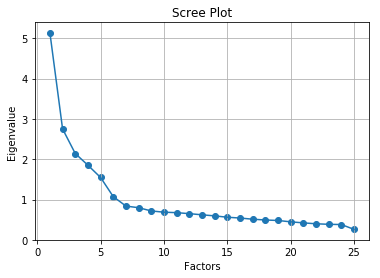

In [ ]:
# Create scree plot using matplotlib
plt.scatter(range(1,factor_analysis_data.shape[1]+1),eigen_values)
plt.plot(range(1,factor_analysis_data.shape[1]+1),eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

The scree plot method draws a straight line for each factor and its eigenvalues. Number of eigenvalues greater than one considered as the number of factors.
Here, we can observe that for 6-factors eigenvalue is just greater than one. So we choose 6 as the number of factors

### 4.Determine which variables are important for which factors?

In [ ]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.set_params(n_factors=6, rotation="varimax")
fa.fit(factor_analysis_data)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
        method='minres', n_factors=6, rotation='varimax',
        rotation_kwargs={}, use_smc=True)

In [ ]:
pd.DataFrame(fa.loadings_,columns=['factor1','factor2','factor3','factor4','factor5','factor6'],index=factor_analysis_data.columns)

,factor1,factor2,factor3,factor4,factor5,factor6
A1,0.095220,0.040783,0.048734,-0.530987,-0.113057,0.161216
A2,0.033131,0.235538,0.133714,0.661141,0.063734,-0.006244
A3,-0.009621,0.343008,0.121353,0.605933,0.033990,0.160106
A4,-0.081518,0.219717,0.235140,0.404594,-0.125338,0.086356
A5,-0.149616,0.414458,0.106382,0.469698,0.030977,0.236519
C1,-0.004358,0.077248,0.554582,0.007511,0.190124,0.095035
C2,0.068330,0.038370,0.674545,0.057055,0.087593,0.152775
C3,-0.039994,0.031867,0.551164,0.101282,-0.011338,0.008996
C4,0.216283,-0.066241,-0.638475,-0.102617,-0.143846,0.318359
C5,0.284187,-0.180812,-0.544838,-0.059955,0.025837,0.132423
